In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


Проверяем формат столбцов

In [3]:
print(df.dtypes)

Дата            object
Склад            int64
Контрагент      object
Номенклатура    object
Количество       int64
dtype: object


Сразу переведем столбец "Дата" в правильный формат

In [4]:
df['Дата'] = pd.to_datetime(df['Дата'], format='%Y-%m-%d')

Сгруппируйте данные по дате, посчитайте количество продаж

In [5]:
grouped_df = df.groupby('Дата')['Количество'].sum().reset_index()
print(grouped_df)

          Дата  Количество
0   2018-01-04        3734
1   2018-01-05        3643
2   2018-01-06        3193
3   2018-01-07        3298
4   2018-01-09        4055
..         ...         ...
200 2018-08-26        5302
201 2018-08-28        5983
202 2018-08-29        4969
203 2018-08-30        4648
204 2018-08-31        4570

[205 rows x 2 columns]


Вывести несколько первых строк сгруппированных данных

In [6]:
grouped_df = df.groupby('Дата')['Количество'].sum().reset_index()

print(grouped_df.head())

        Дата  Количество
0 2018-01-04        3734
1 2018-01-05        3643
2 2018-01-06        3193
3 2018-01-07        3298
4 2018-01-09        4055


Нарисуйте график продаж у `grouped_df`

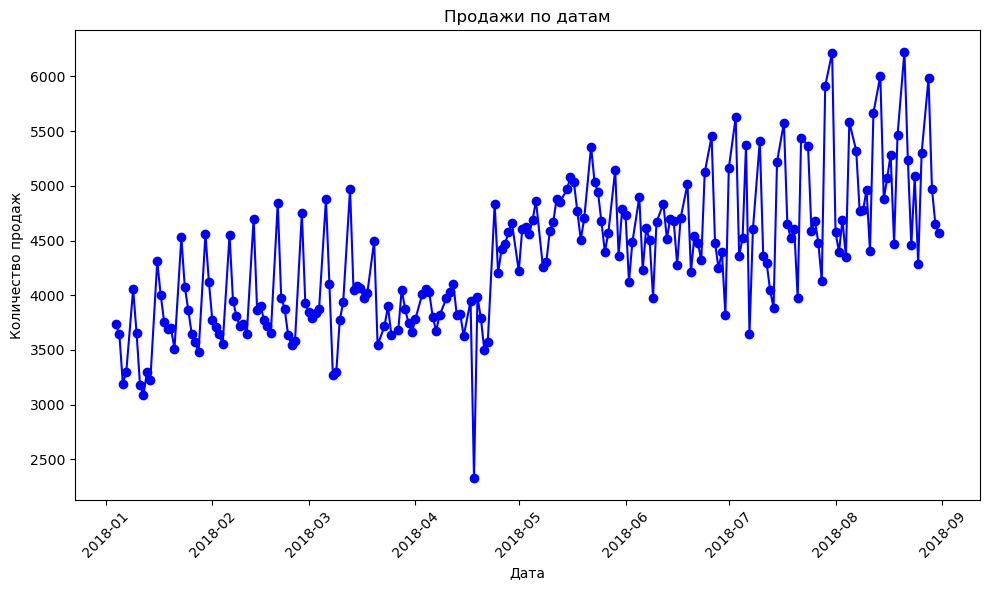

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(grouped_df['Дата'], grouped_df['Количество'], marker='o', linestyle='-', color='b')

plt.title('Продажи по датам')
plt.xlabel('Дата')
plt.ylabel('Количество продаж')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Опишите что вы видите на графике. Ваша задача - максимально описать график

In [8]:
На графике у нас есть даты (по оси X) и количество продаж (по оси Y). Мы видим линию, которая показывает, как менялось количество продаж с каждым днем.
Если линия поднималась, это означало, что продажи увеличивались.
Если линия опускалась, значит продажи снижались.
В некоторых местах линия может быть плоской — это может означать, что продажи оставались примерно одинаковыми в несколько дней.
Также на оси X будут помечены даты, и если их много, то они могут быть покручены (для удобства), чтобы все поместилось.
График показывает, как менялись продажи — были ли пики (когда продажи сильно выросли) или падения (когда продажи снизились).

SyntaxError: invalid character '—' (U+2014) (3889022451.py, line 4)

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [9]:
Q1 = df['Количество'].quantile(0.25)
Q3 = df['Количество'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Количество'] < lower_bound) | (df['Количество'] > upper_bound)]

max_outlier = outliers.loc[outliers['Количество'].idxmax()]

print(max_outlier)

Дата            2018-06-28 00:00:00
Склад                             1
Контрагент              address_208
Номенклатура              product_0
Количество                      200
Name: 218822, dtype: object


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

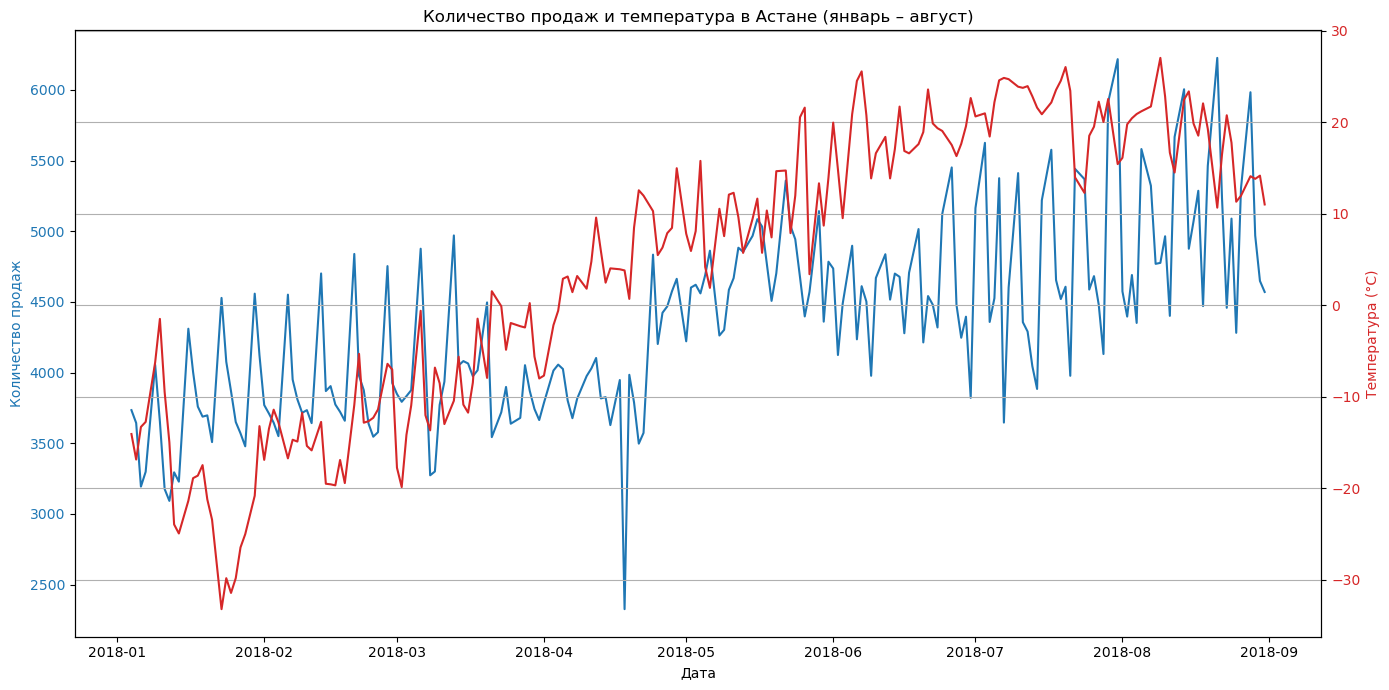

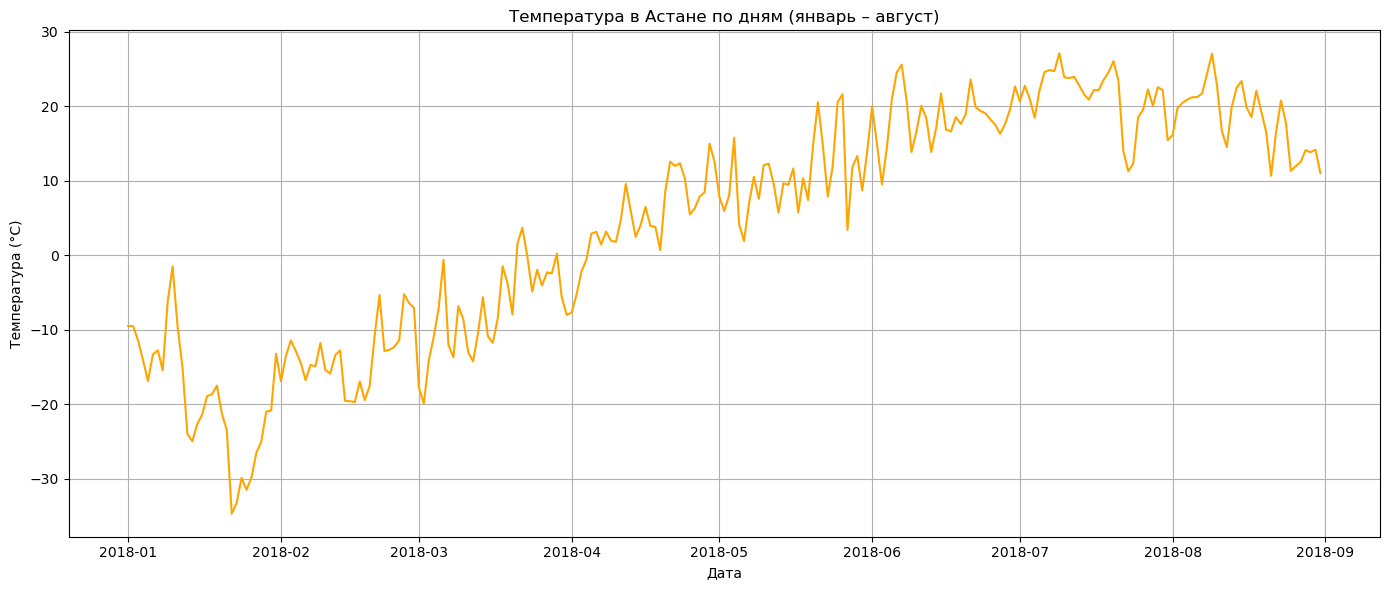

In [4]:
df = pd.read_csv('data.csv')
grouped_df = df.groupby('Дата')['Количество'].sum().reset_index()
grouped_df['Дата'] = pd.to_datetime(grouped_df['Дата']).dt.date

weather_df = pd.read_excel('weather.xlsx')
weather_df.columns = weather_df.columns.str.strip()
weather_df['Местное время в Астане'] = pd.to_datetime(weather_df['Местное время в Астане'], errors='coerce')
weather_df['T'] = pd.to_numeric(weather_df['T'], errors='coerce')

daily_weather = weather_df.groupby(weather_df['Местное время в Астане'].dt.date).agg({'T': 'mean'}).reset_index()
daily_weather.rename(columns={'Местное время в Астане': 'Дата'}, inplace=True)

merged_df = pd.merge(grouped_df, daily_weather, on='Дата', how='left')
merged_df['Дата'] = pd.to_datetime(merged_df['Дата'])
merged_df_filtered = merged_df[merged_df['Дата'].dt.month <= 8]

fig, ax1 = plt.subplots(figsize=(14, 7))
color = 'tab:blue'
ax1.set_xlabel('Дата')
ax1.set_ylabel('Количество продаж', color=color)
ax1.plot(merged_df_filtered['Дата'], merged_df_filtered['Количество'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Температура (°C)', color=color)
ax2.plot(merged_df_filtered['Дата'], merged_df_filtered['T'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Количество продаж и температура в Астане (январь – август)')
fig.tight_layout()
plt.grid(True)
plt.show()

daily_weather['Дата'] = pd.to_datetime(daily_weather['Дата'])
daily_weather_filtered = daily_weather[daily_weather['Дата'].dt.month <= 8]

plt.figure(figsize=(14, 6))
plt.plot(daily_weather_filtered['Дата'], daily_weather_filtered['T'], color='orange')
plt.title('Температура в Астане по дням (январь – август)')
plt.xlabel('Дата')
plt.ylabel('Температура (°C)')
plt.grid(True)
plt.tight_layout()
plt.show()